In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
train = pd.read_csv('/content/drive/My Drive/Hackerearth/Adopt Pet/train.csv')
test = pd.read_csv('/content/drive/My Drive/Hackerearth/Adopt Pet/test.csv')

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
train.isnull().sum(),test.isnull().sum()

(pet_id               0
 issue_date           0
 listing_date         0
 condition         1477
 color_type           0
 length(m)            0
 height(cm)           0
 X1                   0
 X2                   0
 breed_category       0
 pet_category         0
 dtype: int64, pet_id            0
 issue_date        0
 listing_date      0
 condition       619
 color_type        0
 length(m)         0
 height(cm)        0
 X1                0
 X2                0
 dtype: int64)

In [105]:
train.dtypes,test.dtypes

(pet_id             object
 issue_date         object
 listing_date       object
 condition         float64
 color_type         object
 length(m)         float64
 height(cm)        float64
 X1                  int64
 X2                  int64
 breed_category    float64
 pet_category        int64
 dtype: object, pet_id           object
 issue_date       object
 listing_date     object
 condition       float64
 color_type       object
 length(m)       float64
 height(cm)      float64
 X1                int64
 X2                int64
 dtype: object)

In [106]:
k=['issue_date','listing_date']
for i in k:
  train[i] = pd.to_datetime(train[i])
  test[i] = pd.to_datetime(test[i])

In [107]:
k2 = ['issue_date','listing_date']
for i in k2:
  test[i+'_'+'day'] = test[i].dt.day
  test[i+'_'+'month'] = test[i].dt.month
  test[i+'_'+'year'] =test[i].dt.year
  test[i+'_'+'hour'] =test[i].dt.hour
  test[i+'_'+'minute'] =test[i].dt.minute
  test[i+'_'+'seconds'] =test[i].dt.second
  test[i+'_'+'weekofyear'] = test[i].dt.weekofyear
  test[i+'_'+'dayofweek'] =test[i].dt.dayofweek
  test[i+'_'+'weekend'] = (test[i].dt.weekday >=5).astype(int)
  train[i+'_'+'day'] = train[i].dt.day
  train[i+'_'+'month'] = train[i].dt.month
  train[i+'_'+'year'] =train[i].dt.year
  train[i+'_'+'hour'] =train[i].dt.hour
  train[i+'_'+'minute'] =train[i].dt.minute
  train[i+'_'+'seconds'] =train[i].dt.second
  train[i+'_'+'weekofyear'] = train[i].dt.weekofyear
  train[i+'_'+'dayofweek'] =train[i].dt.dayofweek
  train[i+'_'+'weekend'] = (train[i].dt.weekday >=5).astype(int)

In [108]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_date_day,issue_date_month,issue_date_year,issue_date_hour,issue_date_minute,issue_date_seconds,issue_date_weekofyear,issue_date_dayofweek,issue_date_weekend,listing_date_day,listing_date_month,listing_date_year,listing_date_hour,listing_date_minute,listing_date_seconds,listing_date_weekofyear,listing_date_dayofweek,listing_date_weekend
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,10,7,2016,0,0,0,27,6,1,21,9,2016,16,25,0,38,2,0
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,21,11,2013,0,0,0,47,3,0,27,12,2018,17,47,0,52,3,0
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,28,9,2014,0,0,0,39,6,1,19,10,2016,8,24,0,42,2,0
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,31,12,2016,0,0,0,52,5,1,25,1,2019,18,30,0,4,4,0
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,28,9,2017,0,0,0,39,3,0,19,11,2017,9,38,0,46,6,1


In [109]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
l=['condition']
for i in l:
  train[i]=train[i].fillna(-99)
  test[i]=test[i].fillna(-99)

In [110]:
train['diff_days'] = (train['listing_date'] - train['issue_date']).dt.days
train['number_months'] = ((train.listing_date - train.issue_date)/np.timedelta64(1, 'M')).astype('int')
train['number_year'] = ((train.listing_date - train.issue_date)/np.timedelta64(1, 'Y')).astype('int')
test['diff_days'] = (test['listing_date'] - test['issue_date']).dt.days
test['number_months'] = ((test.listing_date - test.issue_date)/np.timedelta64(1, 'M')).astype('int')
test['number_year'] = ((test.listing_date - test.issue_date)/np.timedelta64(1, 'Y')).astype('int')

In [111]:
train2 = train.copy()
test2 = test.copy()

In [112]:
del train2['listing_date']
del train2['issue_date']
del test2['listing_date']
del test2['issue_date']

In [113]:
train2.head(3)

,pet_id,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_date_day,issue_date_month,issue_date_year,issue_date_hour,issue_date_minute,issue_date_seconds,issue_date_weekofyear,issue_date_dayofweek,issue_date_weekend,listing_date_day,listing_date_month,listing_date_year,listing_date_hour,listing_date_minute,listing_date_seconds,listing_date_weekofyear,listing_date_dayofweek,listing_date_weekend,diff_days,number_months,number_year
0,ANSL_69903,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,10,7,2016,0,0,0,27,6,1,21,9,2016,16,25,0,38,2,0,73,2,0
1,ANSL_66892,1.0,White,0.72,14.19,13,9,0.0,2,21,11,2013,0,0,0,47,3,0,27,12,2018,17,47,0,52,3,0,1862,61,5
2,ANSL_69750,-99.0,Brown,0.15,40.90,15,4,2.0,4,28,9,2014,0,0,0,39,6,1,19,10,2016,8,24,0,42,2,0,752,24,2


In [114]:
#train2['length(cm)'] = train2['length(m)'].apply(lambda x: x*100 )
#test2['length(cm)'] = test2['length(m)'].apply(lambda x: x*100 )
#del train2['length(m)']
#del test2['length(m)']
train2['height(m)'] = train2['height(cm)'].apply(lambda x: x/100 )
test2['height(m)'] = test2['height(cm)'].apply(lambda x: x/100 )

In [115]:
del train2['height(cm)']
del test2['height(cm)']

In [116]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
train2['height_bin'] = km.fit_predict(train2[['height(m)']])
train2['length_bin'] = km.fit_predict(train2[['length(m)']])
test2['height_bin'] = km.fit_predict(test2[['height(m)']])
test2['length_bin'] = km.fit_predict(test2[['length(m)']])

In [117]:
train2['area'] = train2['length(m)'] * train2['height(m)']
test2['area'] = test2['length(m)'] * test2['height(m)']
train2['X_mean'] = train2[['X1', 'X2']].mean(axis=1)
test2['X_mean'] = test2[['X1', 'X2']].mean(axis=1)
train2['X_median'] = train2[['X1', 'X2']].median(axis=1)
test2['X_median'] = test2[['X1', 'X2']].median(axis=1)
train2['X_product'] = train2['X1'] * train2['X2']
test2['X_product'] = test2['X1'] * test2['X2']

In [118]:
c=['color_type','condition','listing_date_year','issue_date_year']
for i in c:
  loc = np.append(train2[i].values, test2[i].values, axis=0)
  from sklearn.preprocessing import LabelEncoder
  l=LabelEncoder()
  l.fit(list(set(loc)))
  train2[i]=l.transform(train2[i])
  test2[i]=l.transform(test2[i])

In [119]:
y1 = train2['breed_category']
y2 = train2['pet_category']
X = train2.drop(columns=['pet_id', 'breed_category','pet_category'])

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

In [121]:
id = test2['pet_id']
test_final = test2.drop(columns=['pet_id'])

In [122]:
pet = X.copy()
temp = pet.groupby(['condition']).agg({'X1':['mean','sum','median'],
                                         'X2': ['mean','sum','median'],
                                         'length(m)': ['mean','sum','median'],
                                         'height(m)': ['mean','sum','median'],
                                         'condition': ['mean','sum','median'],
                                         'color_type': ['sum']})
temp.columns = temp.columns.map('_'.join)
temp1 = temp.reset_index()
pet = pd.merge(pet, temp1, on='condition', how='left')

In [123]:
pet_train = pet.copy()
#features = ['diff_days','color_type','condition','X_mean','X_product','number_months','X1','issue_date_month']
#feat2 = ['diff_days','color_type','X_mean','X_product','number_months','X1','issue_date_month','X2','listing_date_hour','number_year']
test2 = ['color_type','diff_days','number_months','X1','issue_date_weekofyear','issue_date_month','condition','X_mean','X_median']  
pet_train = pet_train[test2]

In [124]:
X_test_pet = test_final[test2]

In [125]:
# features = ['diff_days','color_type','condition','X1','X2']  #900 0.6 
#lgbmc2 = LGBMClassifier(random_state=101, n_estimators=900, colsample_bytree=0.6, max_depth=31,  objective='multiclass',
#                       learning_rate=0.01,reg_alpha=0, reg_lambda=1, boosting_type='gbdt')
#cross_val_score(lgbmc2, pet_train, y2, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

In [126]:
#lgbmc2.fit(pet_train,y2)
#pred2 = lgbmc2.predict(X_test_pet)

In [127]:
from sklearn.model_selection import KFold,StratifiedKFold

errcat2 = []
y_pred_totcat2 = []

fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(pet_train,y2):
    X_train, X_test = pet_train.loc[train_index], pet_train.loc[test_index]
    y_train, y_test = y2[train_index], y2[test_index]
    
    lg1 = LGBMClassifier(random_state=101, n_estimators=900, colsample_bytree=0.6, max_depth=31,  objective='multiclass',
                       learning_rate=0.01,reg_alpha=0, reg_lambda=1, boosting_type='gbdt')
    lg1.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_cat = lg1.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred_cat))

    errcat2.append(accuracy_score(y_test,y_pred_cat))
    p = lg1.predict(X_test_pet)
    y_pred_totcat2.append(p)

Accuracy:  0.9087048832271762
Accuracy:  0.9012738853503185
Accuracy:  0.9156050955414012
Accuracy:  0.9065817409766455
Accuracy:  0.9208709506107275
Accuracy:  0.9070631970260223
Accuracy:  0.9166224110462029
Accuracy:  0.9123738714816781
Accuracy:  0.9081253319171535
Accuracy:  0.9033457249070632


In [128]:
np.mean(errcat2,0)

0.910056709208439

In [129]:
lg_final2 = np.squeeze(np.mean(y_pred_totcat2,0).astype(int))
lg_final2

array([2, 1, 2, ..., 2, 4, 2])

In [130]:
breed = X.copy()
temp3 = breed.groupby(['condition']).agg({'X1':['mean','sum','median'],
                                         'X2': ['mean','sum','median'],
                                         'length(m)': ['mean','sum','median'],
                                         'height(m)': ['mean','sum','median'],
                                         'condition': ['mean','sum','median'],
                                         'color_type': ['sum']})
temp3.columns = temp3.columns.map('_'.join)
temp4 = temp3.reset_index()
breed = pd.merge(breed, temp4, on='condition', how='left')

In [131]:
breed_train = breed.copy()
features2 = ['length(m)', 'color_type','height(m)','condition','listing_date_day','area', 'issue_date_day','diff_days','listing_date_minute']
breed_train = breed_train[features2]

In [132]:
X_test_breed = test_final[features2]

In [133]:
#lgbmc1 = LGBMClassifier(random_state=42, n_estimators=100, colsample_bytree=0.8, max_depth=31,  objective='multiclass',
#                       learning_rate=0.01,reg_alpha=0, reg_lambda=1, boosting_type='gbdt')
#cross_val_score(lgbmc1, breed_train, y1, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

In [134]:
#lgbmc1.fit(breed_train,y1)
#pred1 = lgbmc1.predict(X_test_breed)

In [141]:
from sklearn.model_selection import KFold,StratifiedKFold

errcat1 = []
y_pred_totcat1 = []

fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(breed_train,y1):
    X_train, X_test = breed_train.loc[train_index], breed_train.loc[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    
    lg2 = LGBMClassifier(random_state=101, n_estimators=100, colsample_bytree=0.9, max_depth=31,  objective='multiclass',
                       learning_rate=0.01,reg_alpha=0, reg_lambda=1, boosting_type='gbdt')
    lg2.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_cat = lg2.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred_cat))

    errcat1.append(accuracy_score(y_test,y_pred_cat))
    p = lg2.predict(X_test_breed)
    y_pred_totcat1.append(p)

Accuracy:  0.8959660297239915
Accuracy:  0.8938428874734607
Accuracy:  0.9028662420382165
Accuracy:  0.910828025477707
Accuracy:  0.9054699946893255
Accuracy:  0.9049389272437599
Accuracy:  0.9102496016994158
Accuracy:  0.9054699946893255
Accuracy:  0.893255443441317
Accuracy:  0.8948486457780138


In [142]:
np.mean(errcat1,0)

0.9017735792254534

In [143]:
lg_final1 = np.squeeze(np.mean(y_pred_totcat1,0).astype(int))
lg_final1

array([1, 0, 0, ..., 1, 2, 1])

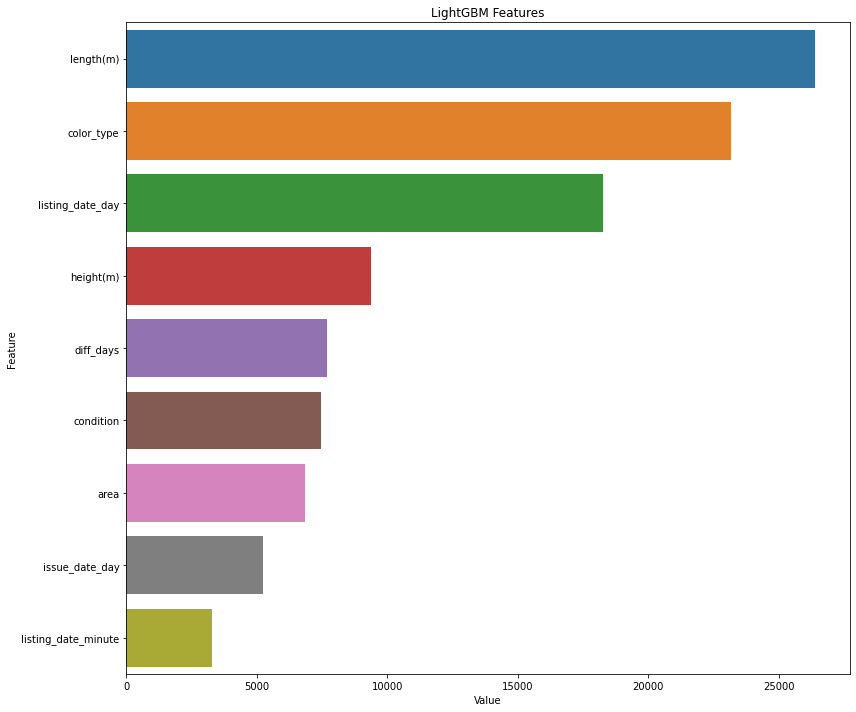

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lg1.feature_importances_, breed_train.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [144]:
sub = pd.DataFrame(data={'pet_id' : id, 'breed_category' : lg_final1, 'pet_category': lg_final2})
sub.to_csv('submission.csv', index=False)

In [145]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>